In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data_A.csv")

NOMOR 1

In [3]:
df.head()

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,7317,15637411,Tochukwu,749.0,France,Male,30.0,1,0.00,2,0,0,126551.65,1
1,1,11125,15745307,Martin,683.0,Germany,Male,32.0,7,121887.91,1,1,1,176570.46,0
2,2,45720,15677382,Aitken,711.0,Spain,Female,33.0,5,0.00,2,1,0,162703.80,0
3,3,74042,15694450,Tuan,722.0,France,Female,28.0,4,0.00,2,1,1,76615.31,0
4,4,109985,15734987,Aitken,754.0,France,Female,67.0,3,0.00,2,1,1,114514.92,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41258 non-null  int64  
 1   id               41258 non-null  int64  
 2   CustomerId       41258 non-null  int64  
 3   Surname          41258 non-null  object 
 4   CreditScore      41238 non-null  float64
 5   Geography        41258 non-null  object 
 6   Gender           41258 non-null  object 
 7   Age              41258 non-null  float64
 8   Tenure           41258 non-null  int64  
 9   Balance          41258 non-null  float64
 10  NumOfProducts    41258 non-null  int64  
 11  HasCrCard        41258 non-null  int64  
 12  IsActiveMember   41258 non-null  int64  
 13  EstimatedSalary  41258 non-null  float64
 14  churn            41258 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 4.7+ MB


DATA PRE-PROSESSING

Karena modeling yang kita lakukan berfokus ke churn, maka disini saya akan menghapus kolom yang tidak dibutuhkan dan tidak berpengaruh terhadap churn yaitu ada 'unnamed 0', id, surname, geography, gender

mengapa saya hapus unnamed 0 tidak ada hubungannya dengan churn ataupun data lainnya, itu hanya merupakan penomoran saja.

In [5]:
df.drop(columns = ['Unnamed: 0','id', 'Surname','Geography'],inplace=True)
df.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,15637411,749.0,Male,30.0,1,0.00,2,0,0,126551.65,1
1,15745307,683.0,Male,32.0,7,121887.91,1,1,1,176570.46,0
2,15677382,711.0,Female,33.0,5,0.00,2,1,0,162703.80,0
3,15694450,722.0,Female,28.0,4,0.00,2,1,1,76615.31,0
4,15734987,754.0,Female,67.0,3,0.00,2,1,1,114514.92,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       41258 non-null  int64  
 1   CreditScore      41238 non-null  float64
 2   Gender           41258 non-null  object 
 3   Age              41258 non-null  float64
 4   Tenure           41258 non-null  int64  
 5   Balance          41258 non-null  float64
 6   NumOfProducts    41258 non-null  int64  
 7   HasCrCard        41258 non-null  int64  
 8   IsActiveMember   41258 non-null  int64  
 9   EstimatedSalary  41258 non-null  float64
 10  churn            41258 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 3.5+ MB


Disini karena semua kolom sudah berbentuk numeric sehingga tidak ada yang perlu kita ubah

In [7]:
for column in df.columns:
    unique_values = df[column].unique()
    print("Unique values for column", column, ":", unique_values)


Unique values for column CustomerId : [15637411 15745307 15677382 ... 15770548 15812262 15714355]
Unique values for column CreditScore : [749. 683. 711. 722. 754. 543. 705. 667. 728. 581. 699. 628. 580. 660.
 743. 700. 613. 669. 767. 694. 590. 642. 687. 653. 682. 663. 592. 600.
 582. 639. 634. 629. 597. 723. 684. 623. 577. 666. 774. 794. 655. 505.
 562. 486. 716. 576. 527. 645. 696. 719. 611. 507. 744. 724. 671. 775.
 706. 710. 762. 496. 672. 739. 640. 709. 850. 569. 554. 707. 677. 635.
 579. 674. 809. 559. 571. 589. 619. 598. 668. 521. 715. 497. 602. 523.
 648. 833. 788. 578. 500. 680. 714. 718. 695. 489. 607. 686. 751. 769.
 632. 608. 561. 661. 650. 646. 732. 662. 797. 584. 678. 759. 630. 520.
 617. 717. 845. 685. 675. 727. 603. 681. 596. 698. 599. 593. 843. 825.
 478. 583. 540. 538. 637. 738. 771. 449. 760. 649. 594. 748. 595. 753.
 624. 679. 487. 779. 690. 625. 752. 492. 549. 729. 692. 758. 703. 616.
 428. 810. 615. 736. 570. 676. 697. 588. 735. 765. 466. 604. 566. 563.
 812. 658. 

disini karena masih ada terdapat nan atau missing value makanya kita akan cek dan hapus missing value tsb dan cek duplicated data

In [8]:
df['Age'] = df['Age'].astype(int)

In [9]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [10]:
df.duplicated().sum()

6

In [11]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [12]:
missing_values_per_column = df.isnull().sum()

print("Missing value pada setiap kolom:")
print(missing_values_per_column)

Missing value pada setiap kolom:
CustomerId          0
CreditScore        20
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
churn               0
dtype: int64


In [13]:
df['CreditScore'] = df['CreditScore'].fillna(657)

In [14]:
df['CreditScore'].isnull().sum()

0

In [15]:
df.describe()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
count,4.125200e+04,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000
mean,1.569184e+07,657.210366,0.565742,38.112649,5.020411,55843.269775,1.554834,0.753854,0.501018,112740.934897,0.208741
std,7.150915e+04,80.308799,0.495665,8.825112,2.798645,62913.546265,0.545587,0.430770,0.500005,50293.407371,0.406414
min,1.556570e+07,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.563294e+07,598.000000,0.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74838.127500,0.000000
50%,1.569016e+07,661.000000,1.000000,37.000000,5.000000,0.000000,2.000000,1.000000,1.000000,118711.750000,0.000000
75%,1.575690e+07,711.000000,1.000000,42.000000,7.000000,120141.637500,2.000000,1.000000,1.000000,155641.855000,0.000000
max,1.581569e+07,850.000000,1.000000,92.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [16]:
df.churn.value_counts()

0    32641
1     8611
Name: churn, dtype: int64

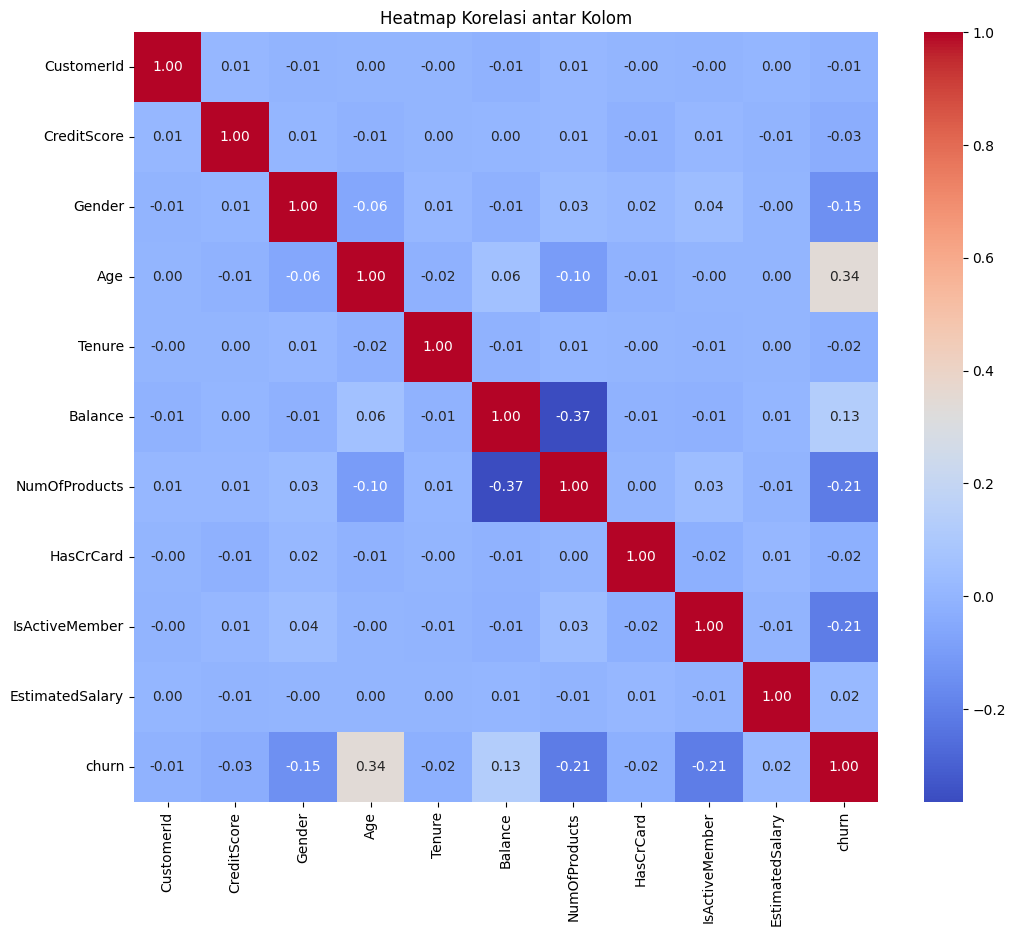

In [17]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi antar Kolom')
plt.show()

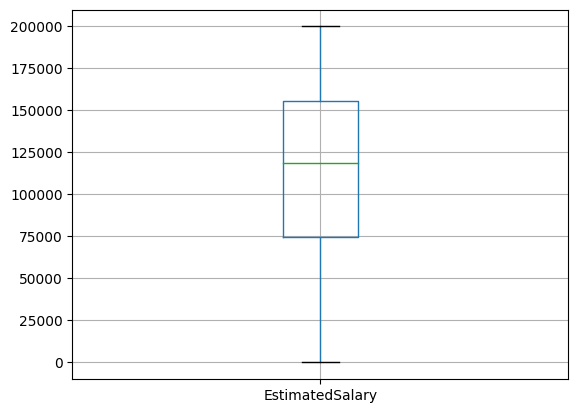

In [18]:
boxplot = df.boxplot(column=['EstimatedSalary'])

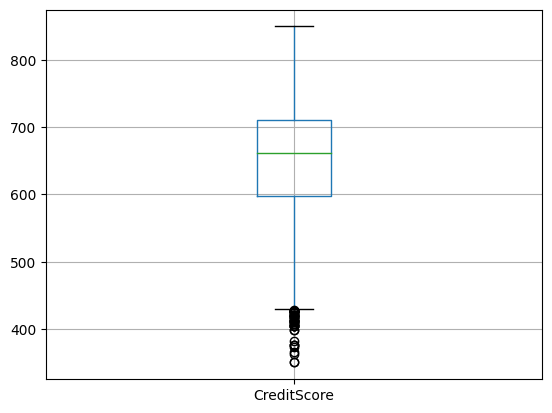

In [19]:
boxplot = df.boxplot(column=['CreditScore'])

Split data into train 80% and test data 20%

In [20]:
input_df=df.drop(['churn','CustomerId'],axis=1)
output_df=df['churn']

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 42)

In [22]:
x_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
40019,543.0,1,26,10,117837.43,1,1,0,160528.65
36567,646.0,1,29,7,0.00,2,1,1,177720.07
35078,731.0,0,48,0,0.00,1,1,0,167553.06
38743,644.0,1,38,6,103138.17,1,1,0,166787.09
4380,651.0,0,55,4,160599.06,1,1,1,38186.85


In [23]:
y_train.head()

40019    0
36567    0
35078    1
38743    0
4380     0
Name: churn, dtype: int64

In [24]:
x_train.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

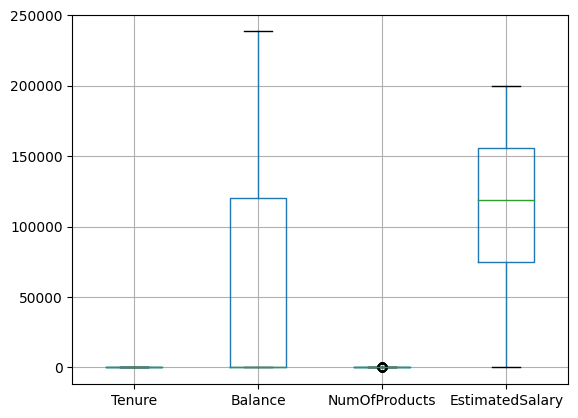

In [25]:
#Check Outliers
boxplot = x_train.boxplot(column=['Tenure','Balance','NumOfProducts','EstimatedSalary'])
plt.show()

RANDOM FOREST

In [26]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

RF_class = RandomForestClassifier(criterion= 'gini',max_depth=4)
RF_class.fit(x_train, y_train)

RandomForestClassifier(max_depth=4)

In [27]:
y_predict=RF_class.predict(x_test)

In [28]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['1','0']))


Classification Report

              precision    recall  f1-score   support

           1       0.85      0.97      0.91      6511
           0       0.77      0.36      0.49      1740

    accuracy                           0.84      8251
   macro avg       0.81      0.66      0.70      8251
weighted avg       0.83      0.84      0.82      8251



XBOOST

In [29]:
import sklearn
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [30]:
# split data into X and y
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [31]:
from sklearn.model_selection import train_test_split # to split the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=42)

In [32]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(33001, 10)
(33001,)
(8251, 10)
(8251,)


In [33]:
# fit model no training data
model_XGB = XGBClassifier(random_state=42)
model_XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [34]:
y_predict = model_XGB.predict(X_test)

In [35]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['1','0']))


Classification Report

              precision    recall  f1-score   support

           1       0.88      0.94      0.91      6511
           0       0.70      0.51      0.59      1740

    accuracy                           0.85      8251
   macro avg       0.79      0.72      0.75      8251
weighted avg       0.84      0.85      0.84      8251



Disini mkesipun hasil yang dihasilkan oleh kedua model tersebut sama, akan tetapi saya memilih menggunakan XGBoost

In [36]:
import pickle

In [37]:
with open('XGBoost.pkl','wb') as file:
  pickle.dump(model_XGB,file)